Edgar Ruiz Tovar

13 de junio de 2025. Querétaro, Qro.

# Sucesión aritmética

In [1]:
a1=2
d=3
n=10

an=[a1+i*d for i in range(n)]
print(an)

[2, 5, 8, 11, 14, 17, 20, 23, 26, 29]


### Interpretación
1. Se me hace padre que use listas por comprensión, siempre es bueno usar la programación funcional en todo lo que se pueda.
2. La sucesión aritmética de aquí va aumentando un factor de 3 cada nuevo término.

# Ejemplo de serie
## Serie de Fourier

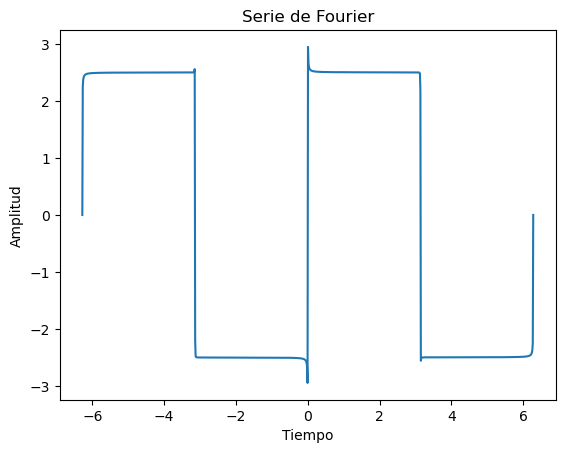

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N=500
t=np.linspace(-2*np.pi,2*np.pi,1000)
y=np.zeros_like(t)
for n in range(1, N+1, 2):
    y+=(10/np.pi)*(1/n)*np.sin(n*t)

plt.plot(t,y)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Serie de Fourier')
plt.show()

### Interpretación
Las series de Fourier lo que hacen es aproximar una función por medio de la suma de senos y cosenos.

En la gráfica podemos ver cómo en ciertos puntos la serie no nos da una función "tan suave", esto se debe al nivel de aproximación que se está usando.

Fourier la usó para resolver la ecuación del calor suponiendo que la solución se puede dar como producto de dos variables y así aplicar el método de variables separables (hay muchos memes de esto).

## Serie de Taylor

x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1


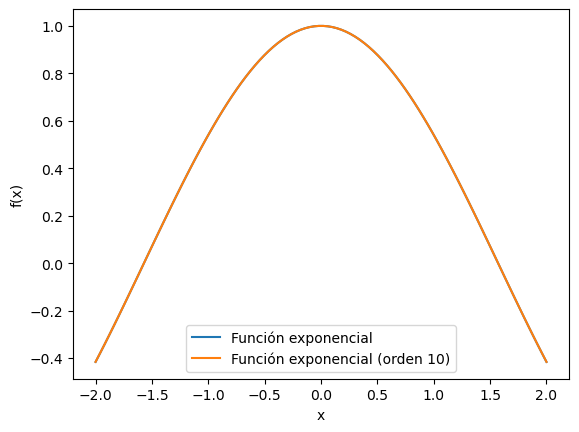

In [3]:
import sympy as sp

x=sp.symbols('x')
f=sp.cos(x)
taylor_exp=f.series(x,0,10).removeO()

print(taylor_exp)
x_vals=np.linspace(-2,2,100)
f_vals=np.cos(x_vals)
taylor_vals=[taylor_exp.subs(x,val) for val in x_vals]

plt.plot(x_vals,f_vals,label='Función exponencial')
plt.plot(x_vals,taylor_vals,label='Función exponencial (orden 10)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Interpretación
Si bien las series de Fourier son de lo más bonito, para mi la idea de Taylor se me hace muy interesante porque lo que hace es aproximar una función por medio de una regresión más un error. Lo padre de esta regresión es que los coeficientes son las derivadas y lo que se refiere al orden es al número de derivada (aproximación que se va a llegar).

En este caso estamos aproximando la función exponencial, y si nos fijamos la Función exponencial original ni siquiera se nota en la gráfica, con lo cual podemos decir que la aproximación es muy precisa ya que no es perceptible distinguir entre una y otra.

## Fourier: calor

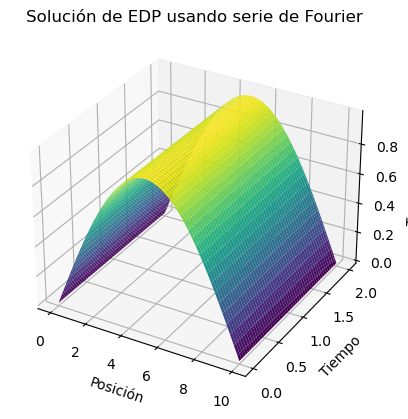

In [4]:
#Parámetros
L=10
T=2
k=0.1

#Condiciones de frontera
x,t = sp.symbols('x t')
u0=sp.sin(sp.pi*x/L)
uL=0

#Serie de Fourier
f=u0
N=50

#Aproximación de la solución
u=0
for n in range(1,N+1):
    Bn=2/L*sp.integrate(f*sp.sin(n*sp.pi*x/L),(x,0,L))
    FourierTerm=Bn*sp.sin(n*sp.pi*x/L)*sp.exp(-n**2*sp.pi**2*k*t/L**2)
    u+=FourierTerm

#Convertir la expresión simbólica a función manejable
u_func=sp.lambdify((x,t),u,'numpy')

#Visualización
x_vals=np.linspace(0,L,100)
t_vals=np.linspace(0,T,100)
X, T=np.meshgrid(x_vals,t_vals)

u_eval=u_func(X,T)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,T,u_eval, cmap='viridis')
ax.set_xlabel('Posición')
ax.set_ylabel('Tiempo')
ax.set_zlabel('Temperatura')
plt.title('Solución de EDP usando serie de Fourier')
plt.show()

### Interpretación
Ajá, aquí lo que decíamos anteriormente de que Fourier uso su método para conseguir dar solución a la función del calor. Si recordamos de la unidad uno, uno de los primeros ejercicios que resolvimos aplicando el método de las diferencia finitas, teníamos exactamente la misma gráfica; es decir, aquí se aplicaron dos métodos computarizados y se llegó al mismo resultado.

La interpretación de la gráfica es muy sencilla: vemos el aumento de la temperatura dado por una condición inicial senoidal, llega a un punto máximo y de ahí comienza a bajar.

Dato curioso, bueno no tanto pero al menos interesante. La transformada de Fourier tiene una integral (pues así se define) y lo interesante es que justamente es una transformada integral. Las hay más como la de Laplace.

## Fourier: onda

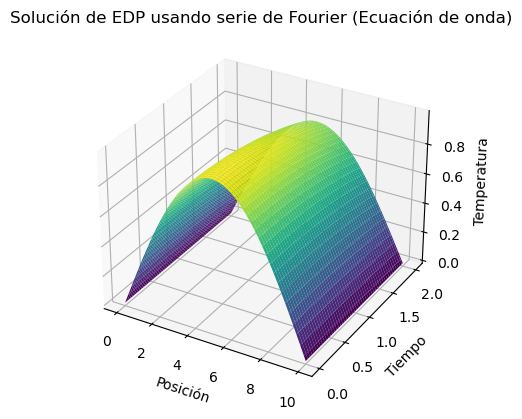

In [6]:
#Parámetros
L=10
T=2
c=1

#Condiciones de frontera
x,t = sp.symbols('x t')
u0=lambda x: sp.sin(sp.pi*x/L)
uL=lambda t:0

#Serie de Fourier
f=u0(x)+uL(t)
N=50

#Aproximación de la solución
u=0
for n in range(1,N+1):
    Bn=2/L*sp.integrate(f*sp.sin(n*sp.pi*x/L),(x,0,L))
    FourierTerm=Bn*sp.sin(n*sp.pi*x/L)*sp.cos(n*sp.pi*c*t/L)
    u+=FourierTerm

#Convertir la expresión simbólica a función manejable
u_func=sp.lambdify((x,t),u,'numpy')

#Visualización
x_vals=np.linspace(0,L,100)
t_vals=np.linspace(0,T,100)
X, T=np.meshgrid(x_vals,t_vals)

u_eval=u_func(X,T)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,T,u_eval, cmap='viridis')
ax.set_xlabel('Posición')
ax.set_ylabel('Tiempo')
ax.set_zlabel('Temperatura')
plt.title('Solución de EDP usando serie de Fourier (Ecuación de onda)')
plt.show()

### Interpretación
Aquí se resuelve la ecuación de onda aplicando el método de las series de Fourier. En el pasado ya hasta hablamos de la solución propuesta de D'Alambert, así que no se qué más decir (veáse interpretación [aquí](https://github.com/eruiz1996/MCD/blob/main/Semestre1/Mates/Practico.ipynb)).

## Fourier: transporte

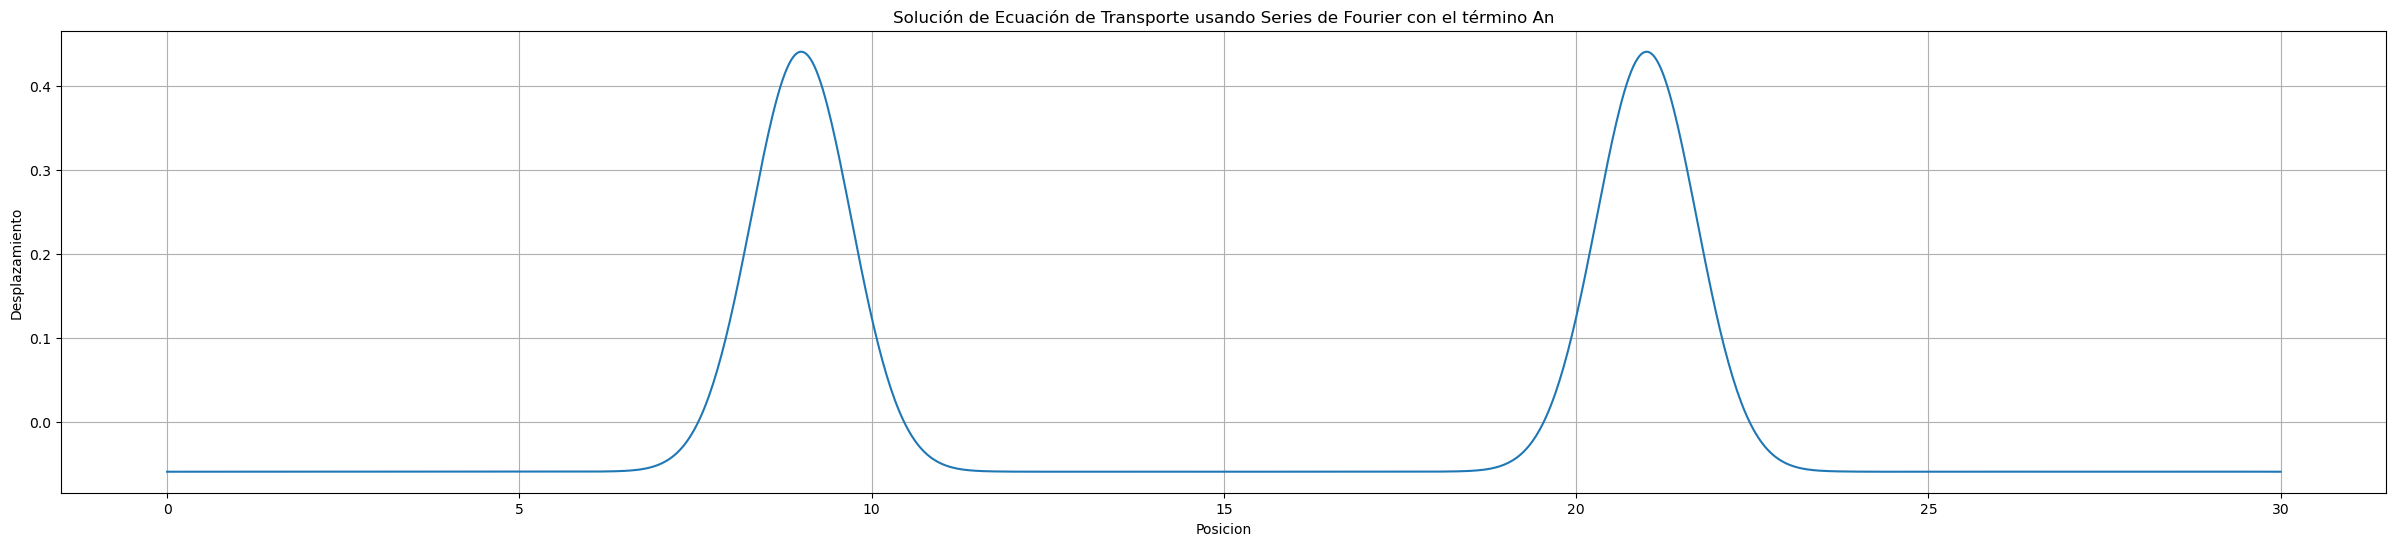

In [7]:
#Parámetros
L=30 #Longitud del dominio
T=6 #Tiempo final
c=1 #Velocidad de transporte

#Condiciones iniciales
u0=lambda x: np.exp(-(x-L/2)**2)

#Serie de Fourier
x=np.linspace(0,L,1000)
f=u0(x)

N=50 #Número de términos en la serie de Fourier

#Aproximación de la solución
u=0
for n in range(1,N+1):
    An=(2/L)*np.trapz(f*np.cos(n*np.pi*x/L),x)
    TerminoFourier=An*np.cos(n*np.pi*c*T/L)*np.cos(n*np.pi*x/L)
    u+=TerminoFourier

#Visualización
plt.figure(figsize=(L,T))
plt.plot(x,u)
plt.xlabel('Posicion')
plt.ylabel('Desplazamiento')
plt.title('Solución de Ecuación de Transporte usando Series de Fourier con el término An')
plt.grid('True')
plt.show()

### Interpretación
Súper, aquí a pesar de que ya habíamos hablado de la ecuación del transporte es una diferente perspectiva ya que la tenemos de forma unidimensional.

La aproximación se hizo con los primeros 50 términos de su desarrollo en la serie de Fourier y se puede apreciar en la gráfica el cómo se va a ir recorriendo (de 0 a 30). Algo interesante es que si aumentarmos en valor de la velocidad del transporte la gráfica de la función se simplifica, pues se van juntando.

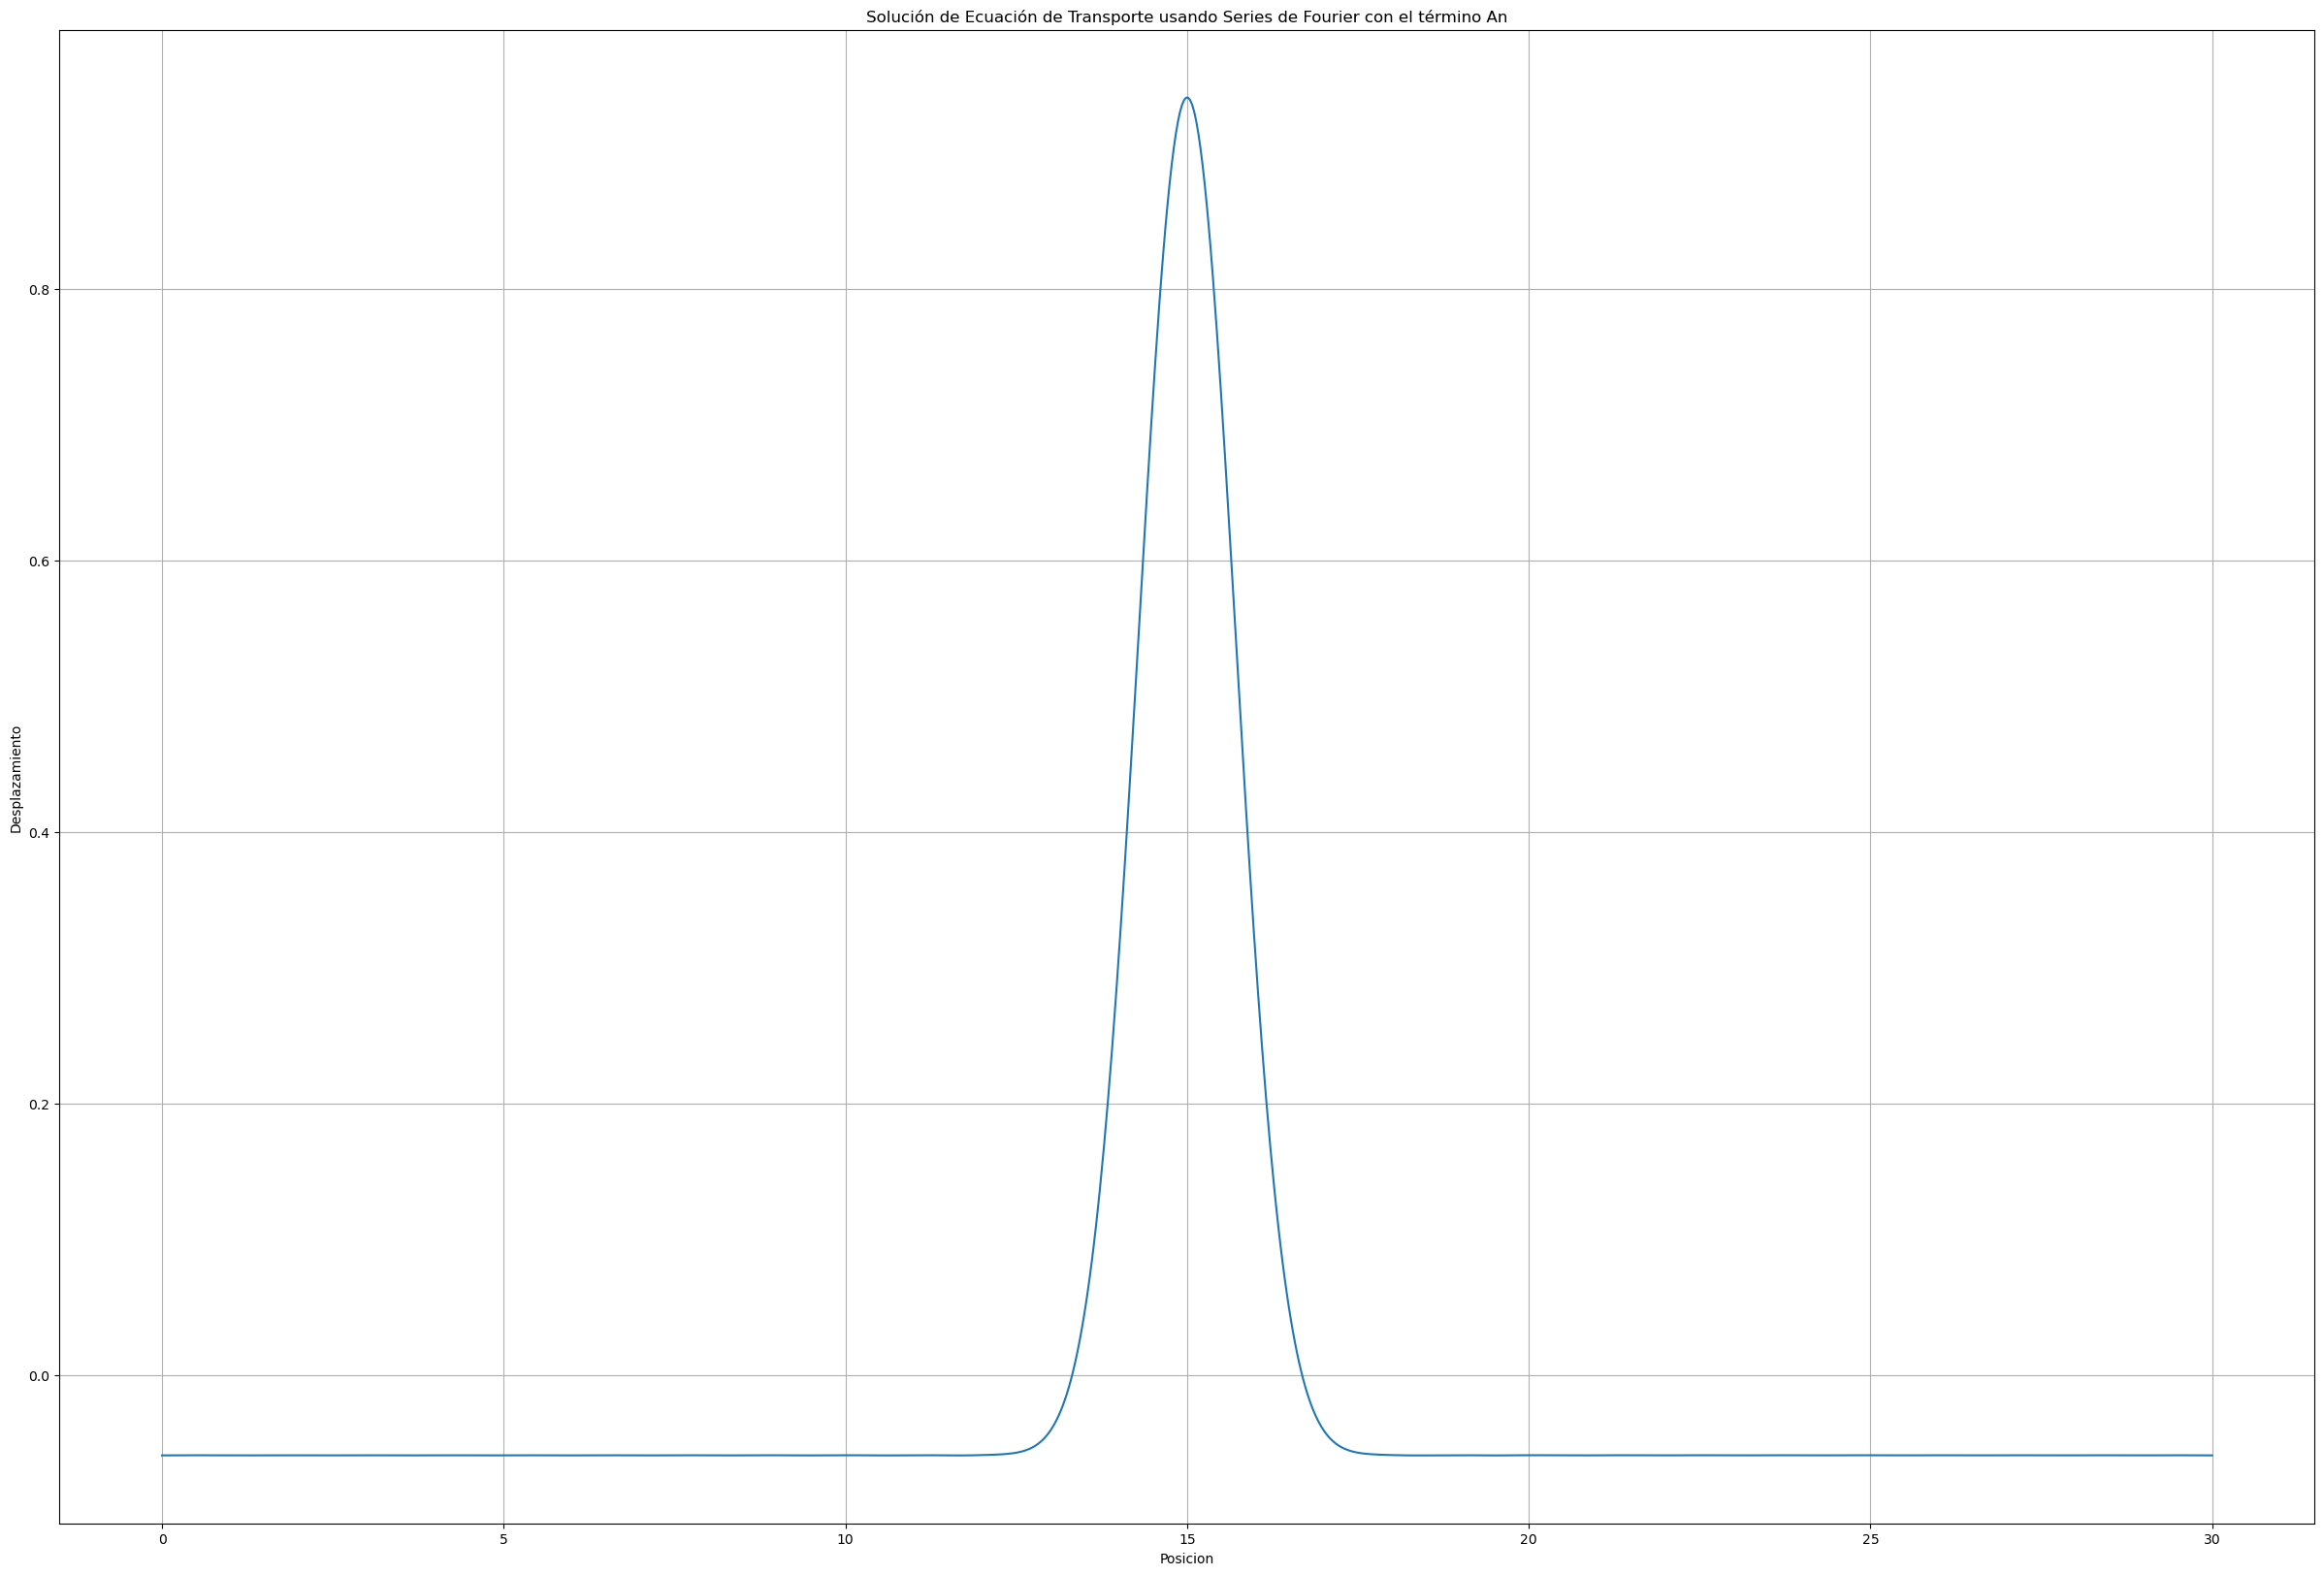

In [17]:
#Parámetros
L=30 #Longitud del dominio
T=20 #Tiempo final
c=6 #Velocidad de transporte

#Condiciones iniciales
u0=lambda x: np.exp(-(x-L/2)**2)

#Serie de Fourier
x=np.linspace(0,L,1000)
f=u0(x)

N=50 #Número de términos en la serie de Fourier

#Aproximación de la solución
u=0
for n in range(1,N+1):
    An=(2/L)*np.trapz(f*np.cos(n*np.pi*x/L),x)
    TerminoFourier=An*np.cos(n*np.pi*c*T/L)*np.cos(n*np.pi*x/L)
    u+=TerminoFourier

#Visualización
plt.figure(figsize=(L,T))
plt.plot(x,u)
plt.xlabel('Posicion')
plt.ylabel('Desplazamiento')
plt.title('Solución de Ecuación de Transporte usando Series de Fourier con el término An')
plt.grid('True')
plt.show()

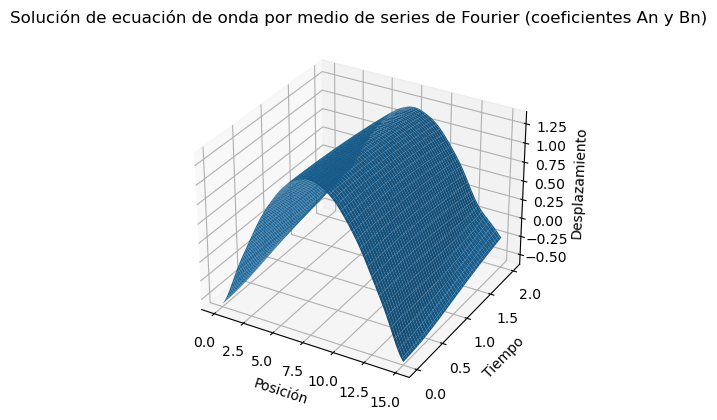

In [19]:
from sympy import symbols, cos, sin, integrate as sympy_int, lambdify

#Parámetros
L=15
T=2
c=1

#Condiciones iniciales y de contorno
x, t=symbols('x t')
u0=lambda x: sin(np.pi*x/L)
uL= lambda t: 0

#Serie de Fourier
f=u0(x)+uL(t)

N=15

#Aproximación de la solución
u=0
for n in range(1,N+1):
    An=(2/L)*sympy_int(f*cos(n*np.pi*x/L),(x,0,L))
    Bn=(2/L)*sympy_int(f*sin(n*np.pi*x/L),(x,0,L))
    TerminoFourier=(An*cos(n*np.pi*x/L)+Bn*sin(n*np.pi*x/L))*cos(n*np.pi*c*t/L)
    u+=TerminoFourier

u_func=lambdify((x, t),u, modules='numpy')

#Visualización
x_vals=np.linspace(0,L,100)
t_vals=np.linspace(0,T,100)
X, T=np.meshgrid(x_vals,t_vals)

#Evaluar la solución en la malla
u_eval=u_func(X,T)

#Usando visualización en 3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,T,u_eval)
ax.set_xlabel('Posición')
ax.set_ylabel('Tiempo')
ax.set_zlabel('Desplazamiento')
ax.set_title('Solución de ecuación de onda por medio de series de Fourier (coeficientes An y Bn)')
plt.show()

### Interpretación
Aquí si le soy sincero me cuesta trabajo saber la diferencia con este método y el de la gráfica que está más arriba donde sólo obtiene un término $B_n$ para obtener la aproximación.

Lo que sí le puedo decir que recuerdo es que se obtenían términos $A_n$ para los cosenos y $B_n$ para los senos. Fuera de ahí creo que no tengo nada más que comentar.

## Gráfica de una función compleja

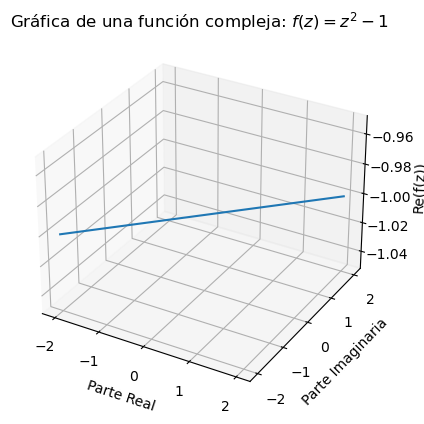

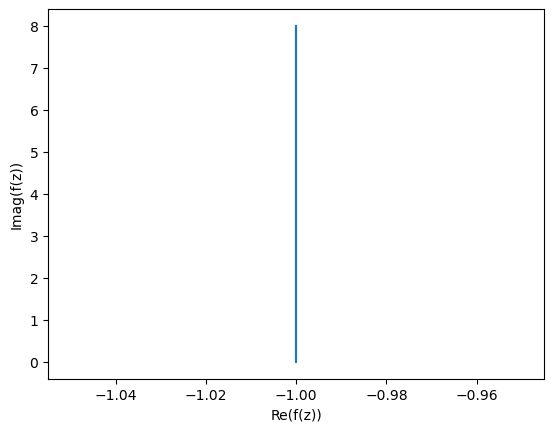

In [24]:
#Definimos variable compleja z
z=np.linspace(-2,2,100)+1j*np.linspace(-2,2,100)

#Función compleja
fz=z**2-1

#Visualización
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot3D(np.real(z),np.imag(z),np.real(fz),linewidth=1.5)
ax.set_xlabel('Parte Real')
ax.set_ylabel('Parte Imaginaria')
ax.set_zlabel('Re(f(z))')
ax.set_title(r'Gráfica de una función compleja: $f(z)=z^2-1$')
plt.grid(True)
plt.show()


plt.plot(np.real(fz),np.imag(fz))
plt.xlabel('Re(f(z))')
plt.ylabel('Imag(f(z))')
plt.show()

### Interpretación
En la primer gráfica conviene pensarlo simplemente como un gráfica en tercera dimensión (parece obvio pero con la palabra imaginario luego uno se confunde), ya que un número complejo se puede definir como un par ordenado $(x,y)$ donde la variable $x$ es la parte real y $y$ la imaginaria.

En este sentido la gráfica de la función se expresaría como:
$$f(z)= z^2-1$$

Lo que nos indica que la gráfica es una parábola en tercera dimensión. Se aprecia como una línea recta en la segunda gráfica por el dominio, pero si se aumenta, como se muestra a continuación, se puede apreciar esto.

Falto mencionar que la segunda gráfica simplemente es verlo desde arriba. Piense en los mapas que describen montañas.

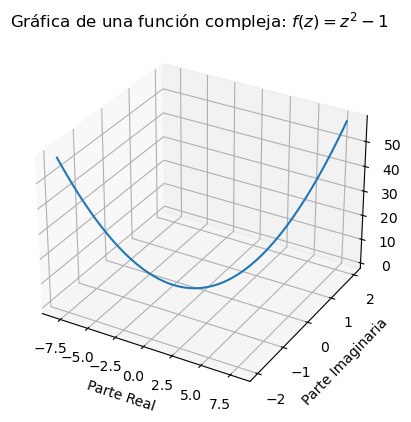

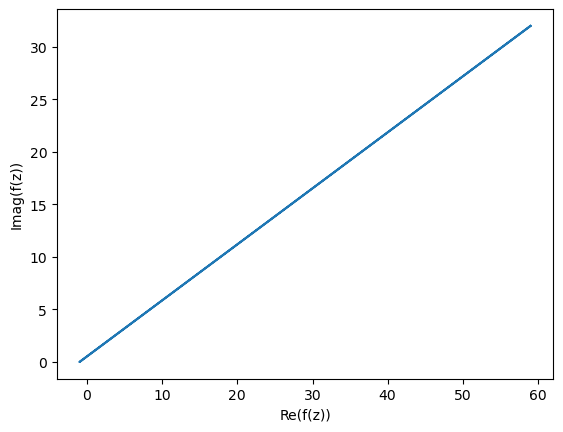

In [23]:
#Definimos variable compleja z
z=np.linspace(-8,8,100)+1j*np.linspace(-2,2,100)

#Función compleja
fz=z**2-1

#Visualización
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot3D(np.real(z),np.imag(z),np.real(fz),linewidth=1.5)
ax.set_xlabel('Parte Real')
ax.set_ylabel('Parte Imaginaria')
ax.set_zlabel('Re(f(z))')
ax.set_title(r'Gráfica de una función compleja: $f(z)=z^2-1$')
plt.grid(True)
plt.show()


plt.plot(np.real(fz),np.imag(fz))
plt.xlabel('Re(f(z))')
plt.ylabel('Imag(f(z))')
plt.show()

In [25]:
import numpy as np

#Definir la variable compleja
z=3+6j

#Realizar operaciones con variable compleja
z_cuadrado=z**2
exp_z=np.exp(z)

#Mostrando los resultados
print('El cuadrado de z es: ',z_cuadrado)
print('El exponencial de z es: ',exp_z)

El cuadrado de z es:  (-27+36j)
El exponencial de z es:  (19.285535745063612-5.6122103059854025j)


### Interpretación
¿Qué decir?

Python permite la declaración de números complejos, por lo que tiene sentido su definición y la operación multiplicación.

Como existe la vectorización, se puede extrapolar a la idea de un número complejo.

Esto nos favilita tener que estar multiplicando por el conjugado.

# Preguntas
## Tema de tesis
Si bien actualmente no tengo un tema definido de tesis, sé que me gustaría enfocarlo al uso de las redes neuronales artificiales. Además del uso directo de las series de Fourier en redes como las Convoluciones, se tienen muchos tipos de funciones: de error, activación, etc. entonces tener herramientas que permiten aproximar funciones puede hacer la diferencia en un modelo de aprendizaje.

## ¿Qué me llevo?
Unos buenos códigos, la verdad estos codigo valen mucho la pena. Respecto a los temas como tal tengo que sacar mi duda de cuál es la diferencia entre una y otra solución a la ecuación de onda.